In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [6]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [7]:
df_DA_US_explode = df_DA_US.explode('job_skills').copy()

In [10]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

In [11]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [12]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [ ]:
df_DA_US_pivot= df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [ ]:
df_DA_US_pivot= df_DA_US_pivot.drop('Total')

In [ ]:
df_totals = df_DA_US.groupby('job_posted_month_no').size()

In [22]:
df_DA_US_percentage = df_DA_US_pivot.div(df_totals/100, axis=0)

In [23]:
# Change month number to month names

df_DA_US_percentage = df_DA_US_percentage.reset_index()
df_DA_US_percentage['job_posted_month'] = df_DA_US_percentage['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percentage = df_DA_US_percentage.set_index('job_posted_month')
df_DA_US_percentage = df_DA_US_percentage.drop(columns='job_posted_month_no')

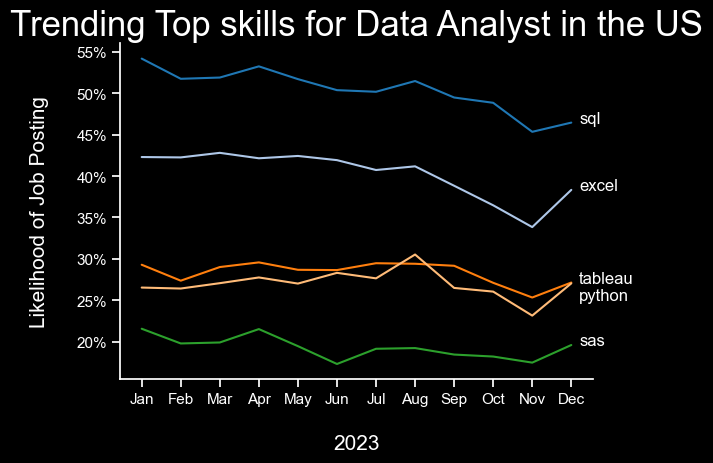

In [81]:
df_plot = df_DA_US_percentage.iloc[:, :5]
sns.set_theme(style='ticks')
plt.style.use('dark_background')

sns.lineplot(data = df_plot, dashes=False, palette='tab20')
sns.despine()


plt.title('Trending Top skills for Data Analyst in the US', fontsize=25)
plt.ylabel('Likelihood of Job Posting\n', fontsize=15)
plt.xlabel('\n2023', fontsize= 15)
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    if df_plot.columns[i] != 'python':
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
    else:
        plt.text(11.2, df_plot.iloc[-1, i] - 2, df_plot.columns[i])
        plt.tight_layout(h_pad=2)

plt.tight_layout()
plt.show()